### Load data

In [1]:
from sklearn import datasets
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')

breast_cancer = datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
target = pd.Series(breast_cancer.target, name='target').map(
    {0: 'A', 1: 'B'},
)
df = pd.concat([data, target], axis=1)

### Create a TabularMagic object

In [2]:
from tabularmagic.api import TabularMagic
tm = TabularMagic(df, test_size=0.3, name='Breast cancer sklearn dataset')

INFO: Initialization complete. Shapes of train, test DataFrames: (398, 31), 
      (171, 31). 


### Exploratory data analysis

In [3]:
tm.eda().categorical_summary_statistics()

,target
Statistic,
n_unique,2
most_common,B
least_common,A
n_missing,0
missing_rate,0.0
n,398


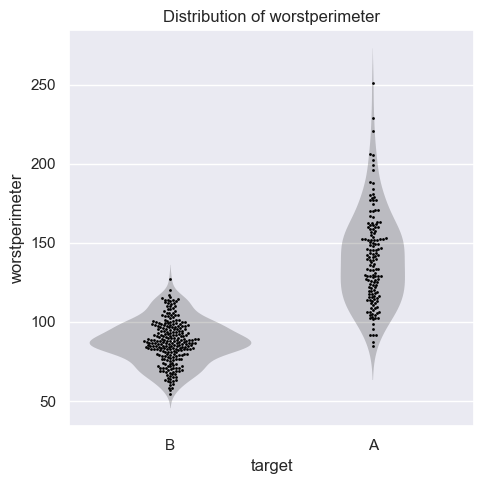

In [4]:
tm.eda().plot_distribution_stratified('worstperimeter', 'target', 
                                      strategy='violin_swarm')

### Preprocess the data

In [17]:
tm.datahandler().load_data_checkpoint().\
    force_binary(['target'], pos_labels=['B']).\
    scale(
        tm.datahandler().continuous_vars(),
        ['B_TRUE(target)'],
        strategy='standardize'
    ).save_data_checkpoint('finished preprocessing')

INFO: Working DataFrames reset to original DataFrames. Shapes of train, test 
      DataFrames: (398, 31), (171, 31). 
INFO: Forced variables target to binary. Variables renamed to B_TRUE(target). 
INFO: Scaled variables worstfractaldimension, worstconcavepoints, meansymmetry, 
      meanconcavepoints, worstsymmetry, perimetererror, symmetryerror, 
      worstconcavity, worstradius, meanradius, meantexture, concavepointserror, 
      smoothnesserror, meanconcavity, meanfractaldimension, worstarea, 
      meansmoothness, compactnesserror, fractaldimensionerror, worstsmoothness, 
      worstcompactness, concavityerror, worsttexture, meanarea, textureerror, 
      radiuserror, meancompactness, areaerror, meanperimeter, worstperimeter 
      using strategy standardize. 
INFO: Saved working DataFrames checkpoint finished preprocessing. 


Breast cancer sklearn dataset 
--------------------------------------------------------------------------------
Train shape: (398, 31)                  Test shape: (171, 31)                   
--------------------------------------------------------------------------------
Categorical variables:
  None 
                                                                                
Continuous variables:
  meanradius, meantexture, meanperimeter, meanarea, meansmoothness, 
  meancompactness, meanconcavity, meanconcavepoints, meansymmetry, 
  meanfractaldimension, radiuserror, textureerror, perimetererror, areaerror, 
  smoothnesserror, compactnesserror, concavityerror, concavepointserror, 
  symmetryerror, fractaldimensionerror, worstradius, worsttexture, 
  worstperimeter, worstarea, worstsmoothness, worstcompactness, worstconcavity, 
  worstconcavepoints, worstsymmetry, worstfractaldimension, B_TRUE(target) 

In [18]:
from tabularmagic.api.mlC import LinearC

tm.datahandler().load_data_checkpoint('finished preprocessing')
report = tm.ml_classification(
    models=[
        LinearC('l1'),
    ],
    y_var='B_TRUE(target)',
    X_vars=['worstperimeter', 'worstradius', 'worstarea', 'worstconcavity'],
    outer_cv=5
)

INFO: Working DataFrames reset to checkpoint finished preprocessing. Shapes of 
      train, test DataFrames: (398, 31), (171, 31). 
INFO: Fitting model LinearC(l1). 
INFO: Fitted model LinearC(l1). 


In [19]:
report.fit_statistics('train')

,LinearC(l1)
Statistic,
accuracy,0.934673
f1,0.947368
precision,0.955102
recall,0.939759
roc_auc,0.981537
n,398


In [14]:
report.fit_statistics('train')

,LinearC(l1)
Statistic,
accuracy,0.934673
f1,0.913907
precision,0.901961
recall,0.926174
roc_auc,0.981537
n,398


In [7]:
report.fit_statistics('train')

,LinearC(l1)
Statistic,
accuracy,0.934673
f1,0.930638
precision,0.928531
recall,0.932967
roc_auc,NaN
n,398


In [13]:
report.cv_fit_statistics(True)

,LinearC(l1),LinearC(l2)
Statistic,,
accuracy,0.929715,0.932278
f1,0.943664,0.946764
precision,0.9501,0.943308
recall,0.938561,0.951425
roc_auc,0.980518,0.980241
n,79.6,79.6


In [8]:
report.model_report('LinearC(l1)').train_report().fit_statistics()

,LinearC(l1)
Statistic,
accuracy,0.934673
f1,0.947368
precision,0.955102
recall,0.939759
roc_auc,0.981537
n,398


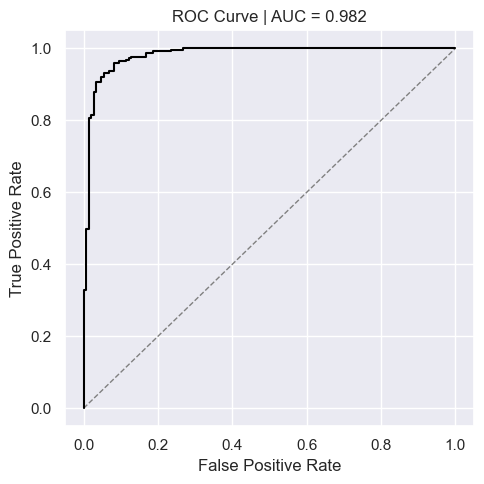

In [10]:
report.model_report('LinearC(l1)').train_report().plot_roc_curve()

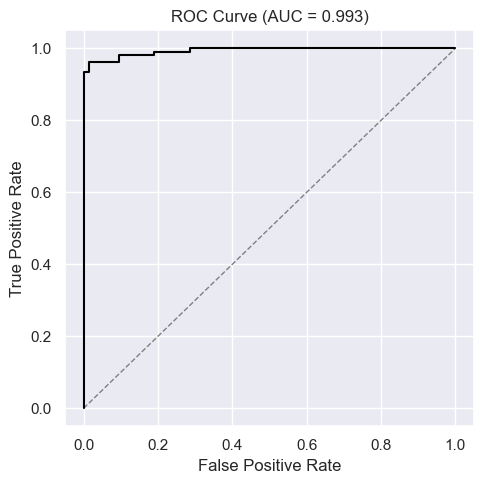

In [13]:
report.model_report('LinearC(l1)').test_report().plot_roc_curve()